In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns  
import matplotlib.pyplot as plt
from scipy.stats import norm
# might be needed depending on your version of Jupyter
%matplotlib inline
#from pandas_datareader import data as wb
from scipy.stats import norm

In [4]:
df = pd.read_csv('../Oil & Gas Production/Pandey_Ch07_Production_Engineering_Code/data/Well_Monthly_ProdT.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   START_DATE  528 non-null    object
 1   OIL         528 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.4+ KB


In [6]:
df.isnull().sum()

START_DATE    0
OIL           0
dtype: int64

In [7]:
df.head()

,START_DATE,OIL
0,1974-01-01,7134368
1,1974-01-02,9528303
2,1974-01-03,12263786
3,1974-01-04,13153821
4,1974-01-05,12240857


In [8]:
df

,START_DATE,OIL
0,1974-01-01,7134368
1,1974-01-02,9528303
2,1974-01-03,12263786
3,1974-01-04,13153821
4,1974-01-05,12240857
...,...,...
523,2017-01-08,8450763
524,2017-01-09,8168717
525,2017-01-10,8668929
526,2017-01-11,8452498


In [9]:
df.corr()['OIL'].sort_values()

OIL    1.0
Name: OIL, dtype: float64

In [10]:
#df.corr()['GAS'].sort_values()

In [11]:
#df.corr()['WATER'].sort_values()

In [12]:
df.corr()

,OIL
OIL,1.0


In [13]:
from datetime import datetime
import statsmodels.api as sm

In [14]:
df.set_index('START_DATE',inplace=True)

In [15]:
df

,OIL
START_DATE,
1974-01-01,7134368
1974-01-02,9528303
1974-01-03,12263786
1974-01-04,13153821
1974-01-05,12240857
...,...
2017-01-08,8450763
2017-01-09,8168717
2017-01-10,8668929


In [16]:
#df = df.drop('WATER',axis=1)

In [17]:
#df = df.drop('UWI',axis=1)

In [18]:
#df = df.drop('GAS',axis=1)

In [19]:
df

,OIL
START_DATE,
1974-01-01,7134368
1974-01-02,9528303
1974-01-03,12263786
1974-01-04,13153821
1974-01-05,12240857
...,...
2017-01-08,8450763
2017-01-09,8168717
2017-01-10,8668929


In [20]:
from scipy import stats
import statsmodels.api as sm

In [21]:
#df=df.replace(0, np.nan)

In [22]:
#df=df.replace(0, np.nan).dropna(subset=["OIL"], how="all")

In [23]:
df

,OIL
START_DATE,
1974-01-01,7134368
1974-01-02,9528303
1974-01-03,12263786
1974-01-04,13153821
1974-01-05,12240857
...,...
2017-01-08,8450763
2017-01-09,8168717
2017-01-10,8668929


In [24]:
log_returns=np.log(1+df.pct_change())
log_returns

,OIL
START_DATE,
1974-01-01,NaN
1974-01-02,0.289343
1974-01-03,0.252384
1974-01-04,0.070062
1974-01-05,-0.071933
...,...
2017-01-08,0.008805
2017-01-09,-0.033945
2017-01-10,0.059433


In [25]:
#log_returns=log_returns.replace([np.inf, -np.inf], np.nan)

In [26]:
#df=df.dropna(subset=["OIL"], how="all")

In [27]:
log_returns

,OIL
START_DATE,
1974-01-01,NaN
1974-01-02,0.289343
1974-01-03,0.252384
1974-01-04,0.070062
1974-01-05,-0.071933
...,...
2017-01-08,0.008805
2017-01-09,-0.033945
2017-01-10,0.059433


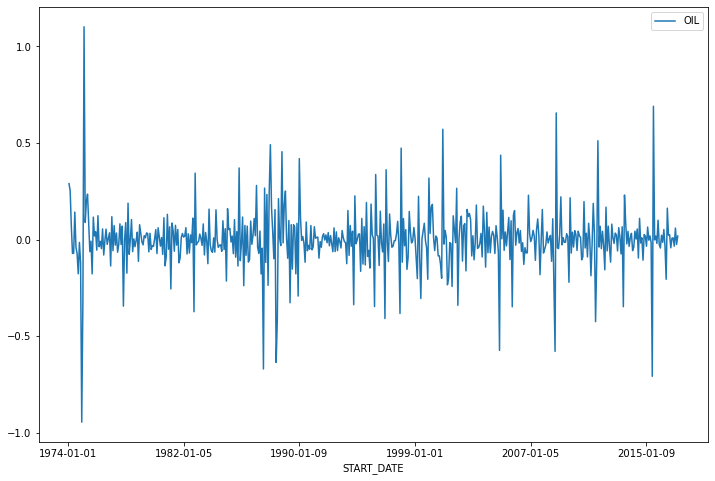

In [28]:
log_returns.plot(figsize=(12,8));

In [29]:
u=log_returns.mean()
u

OIL    0.000356
dtype: float64

In [30]:
drift=u-(0.5*u)
drift

OIL    0.000178
dtype: float64

In [31]:
stdev=log_returns.std()
stdev

OIL    0.160186
dtype: float64

In [32]:
drift.values

array([0.00017806])

In [33]:
stdev.values

array([0.16018593])

In [34]:
norm.ppf(0.95)

1.6448536269514722

In [35]:
x=np.random.rand(10,2)
x

array([[0.43709552, 0.71808633],
       [0.3232429 , 0.19419692],
       [0.17433312, 0.52419601],
       [0.81042528, 0.81099954],
       [0.45089753, 0.00466304],
       [0.04311579, 0.64148628],
       [0.85159443, 0.41817938],
       [0.89828391, 0.65206197],
       [0.14065161, 0.01139432],
       [0.3283668 , 0.41460872]])

In [36]:
norm.ppf(x)

array([[-0.15833727,  0.57716599],
       [-0.45864962, -0.86253381],
       [-0.93717949,  0.06068763],
       [ 0.87946457,  0.88158565],
       [-0.12339406, -2.59986384],
       [-1.71562025,  0.36243439],
       [ 1.04329618, -0.20655327],
       [ 1.27183376,  0.39089337],
       [-1.07739637, -2.27695946],
       [-0.4444274 , -0.21570533]])

In [37]:
z=norm.ppf(np.random.rand(10,2))
z

array([[-0.28287543, -0.09001453],
       [-0.97909188,  1.23538227],
       [-0.57001739,  3.03645992],
       [-0.13553171, -0.13804041],
       [-0.53945497, -0.46351333],
       [ 0.97511664, -0.13713605],
       [-0.20488542,  1.68991019],
       [-0.65090526,  0.74730422],
       [ 0.18527131, -1.69763683],
       [ 1.23644105, -0.38793423]])

In [38]:
t_intervals=1000
iterations=50

In [39]:
Z=norm.ppf(np.random.rand(t_intervals,iterations))
Z

array([[-1.08143048,  0.45756329,  0.54571416, ..., -0.39234529,
         0.70089646, -0.07519588],
       [-1.7956542 , -0.99827406,  1.57519952, ..., -0.97811975,
         0.50669579,  0.40298312],
       [ 0.96600937, -0.84251837,  0.1163784 , ..., -1.65942908,
         2.25216386, -0.18994165],
       ...,
       [ 0.86654669,  0.03521526,  1.19344023, ..., -1.08053384,
        -1.29308551, -0.9834391 ],
       [ 0.68407428, -0.7169845 , -0.19266859, ..., -0.00495246,
         1.77741189,  0.76339808],
       [ 0.12767413, -1.5655988 ,  0.35992557, ...,  0.97499178,
         0.76595142, -1.0647131 ]])

In [40]:
r=(drift.values+(stdev.values*Z))
r

array([[-0.17305189,  0.07347326,  0.08759379, ..., -0.06267013,
         0.11245181, -0.01186726],
       [-0.28746047, -0.1597314 ,  0.25250286, ..., -0.15650296,
         0.0813436 ,  0.06473028],
       [ 0.15491917, -0.13478153,  0.01882024, ..., -0.26563913,
         0.36094302, -0.03024792],
       ...,
       [ 0.13898665,  0.00581905,  0.19135039, ..., -0.17290826,
        -0.20695604, -0.15735505],
       [ 0.10975713, -0.11467277, -0.03068474, ..., -0.00061526,
         0.28489443,  0.12246369],
       [ 0.02062966, -0.25060884,  0.05783307, ...,  0.15635802,
         0.1228727 , -0.170374  ]])

In [41]:
monthly_prod=np.exp(r)
monthly_prod

array([[0.84109397, 1.07623976, 1.09154463, ..., 0.93925325, 1.11901833,
        0.98820288],
       [0.75016622, 0.85237271, 1.28724317, ..., 0.85512899, 1.08474355,
        1.06687123],
       [1.16756358, 0.87390682, 1.01899846, ..., 0.76671576, 1.43468171,
        0.97020497],
       ...,
       [1.14910875, 1.00583601, 1.21088366, ..., 0.84121479, 0.81305539,
        0.85440065],
       [1.116007  , 0.89165788, 0.96978126, ..., 0.99938493, 1.32962166,
        1.13027808],
       [1.02084392, 0.77832676, 1.05953811, ..., 1.16924475, 1.13074047,
        0.84334935]])

In [42]:
S0=df.iloc[-1]
S0

OIL    8607196
Name: 2017-01-12, dtype: int64

In [43]:
Oil_Rate=np.zeros_like(monthly_prod)
Oil_Rate

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
Oil_Rate[0]=S0
Oil_Rate

array([[8607196., 8607196., 8607196., ..., 8607196., 8607196., 8607196.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       ...,
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.]])

In [45]:
for t in range(1,t_intervals):
    Oil_Rate[t]=Oil_Rate[t-1]*monthly_prod[t]
    
Oil_Rate

array([[8.60719600e+06, 8.60719600e+06, 8.60719600e+06, ...,
        8.60719600e+06, 8.60719600e+06, 8.60719600e+06],
       [6.45682766e+06, 7.33653896e+06, 1.10795543e+07, ...,
        7.36026279e+06, 9.33660030e+06, 9.18276982e+06],
       [7.53875682e+06, 6.41145140e+06, 1.12900488e+07, ...,
        5.64322951e+06, 1.33950497e+07, 8.90916892e+06],
       ...,
       [1.96340889e+03, 1.68795840e+05, 1.88936147e+07, ...,
        8.26978138e+05, 6.45414959e+09, 5.69896338e+04],
       [2.19117805e+03, 1.50508140e+05, 1.83226735e+07, ...,
        8.26469491e+05, 8.58157707e+09, 6.44141339e+04],
       [2.23685080e+03, 1.17144514e+05, 1.94135709e+07, ...,
        9.66345110e+05, 9.70353647e+09, 5.43236178e+04]])

(835.0, 875.0)

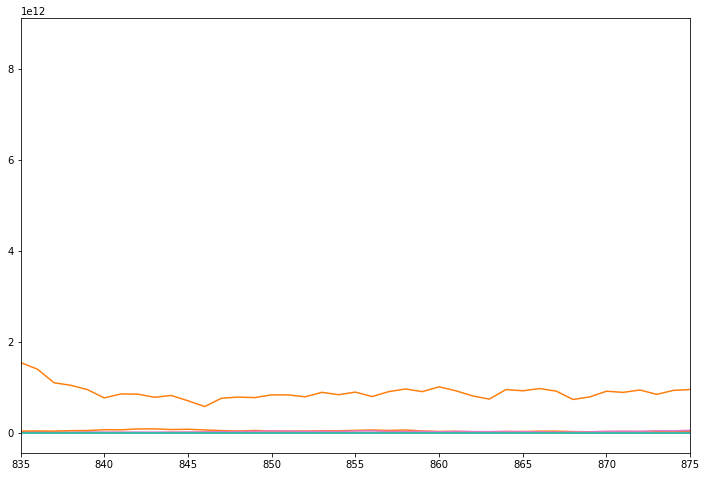

In [46]:
plt.figure(figsize=(12,8));
plt.plot(Oil_Rate);#[:251,:1000]);
plt.xlim([835,875])
#plt.ylim([0,1400])

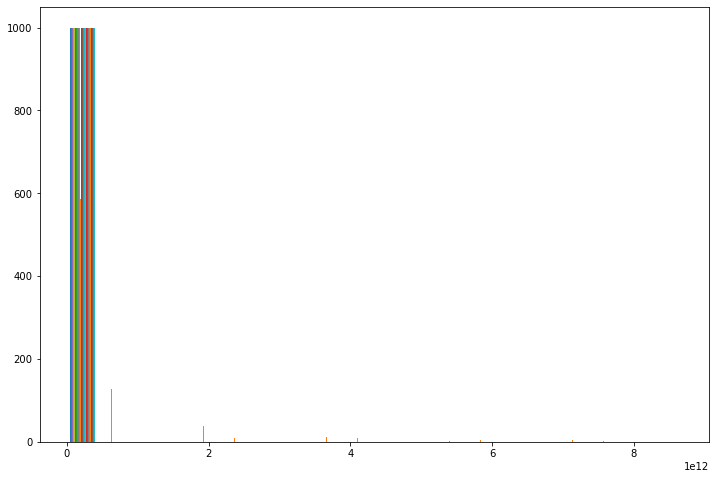

In [47]:
plt.figure(figsize=(12,8));
plt.hist(Oil_Rate,bins=20);
#plt.xlim(left=0,right=0.1)
#plt.xlim([0,0.1])
#plt.ylim([0,400])